# Data Mining and Business Analytics Project

G3-T10 
Ng Hong Liang
Claire Ong Si Ying
Liu Yong
Chen Yibing
Syahmi Bin Mansor

# Personal Finance

## Insights From Singapore's Housing Market

Predicting Singapore Resale Flat Prices in 2019 using Regression

**Table of Contents**

1. Data Pre-processing
    - Libraries and Packages
    - Original Dataset
    - Feature Selection 
    - Multivariable Analysis
    - Check Missing Values
    - Visualize Correlation
    - Check and Fix Skewness
    - Standardisation
    - Convert Categorical Variables
    - Train Test Split
2. Training Data Evaluation
3. Test Data Evaluation


# Data Pre-processing


## Libraries and packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
# import xgboost as xgb
import lightgbm as lgb
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from collections import Counter
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

# Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Modified Dataset

In [2]:
df = pd.read_csv('2019_hdb_dataset_with_mrt_schools_sm.csv')
df.head()

,Unnamed: 0,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Year,...,nearest_primary_school,nearest_primary_school_km,nearest_secondary_school,nearest_secondary_school_km,nearest_JC/MI,nearest_JC_MI_km,nearest_mixed_level,nearest_mixed_level_km,nearest_sm,nearest_sm_distance_km
0,0,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,61 years 01 month,270000.0,2019,...,TECK GHEE PRIMARY SCHOOL,0.355873,DEYI SECONDARY SCHOOL,0.552798,EUNOIA JUNIOR COLLEGE,1.173726,CATHOLIC HIGH SCHOOL,1.083775,G8 MART PTE. LTD.,0.391164
1,1,ANG MO KIO,3 ROOM,04 TO 06,73.0,New Generation,1976,56 years 04 months,295000.0,2019,...,ANG MO KIO PRIMARY SCHOOL,0.401382,ANG MO KIO SECONDARY SCHOOL,0.140156,EUNOIA JUNIOR COLLEGE,0.471203,CHIJ ST. NICHOLAS GIRLS' SCHOOL,1.136466,NTUC Fairprice Co-operative Ltd,0.000000
2,2,ANG MO KIO,3 ROOM,07 TO 09,67.0,New Generation,1978,58 years 01 month,270000.0,2019,...,ANG MO KIO PRIMARY SCHOOL,0.212151,MAYFLOWER SECONDARY SCHOOL,0.319176,EUNOIA JUNIOR COLLEGE,0.605035,CHIJ ST. NICHOLAS GIRLS' SCHOOL,0.820483,SHENG SIONG SUPERMARKET PTE LTD,0.157761
3,3,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1978,58 years,230000.0,2019,...,ANG MO KIO PRIMARY SCHOOL,0.212151,MAYFLOWER SECONDARY SCHOOL,0.319176,EUNOIA JUNIOR COLLEGE,0.605035,CHIJ ST. NICHOLAS GIRLS' SCHOOL,0.820483,SHENG SIONG SUPERMARKET PTE LTD,0.157761
4,4,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,61 years,262500.0,2019,...,TOWNSVILLE PRIMARY SCHOOL,0.297218,DEYI SECONDARY SCHOOL,0.664513,EUNOIA JUNIOR COLLEGE,1.254093,CATHOLIC HIGH SCHOOL,1.044928,G8 MART PTE. LTD.,0.468670


## Feature Selection

In [3]:
df['remaining_lease'] = 99 - (2019 - df['lease_commence_date'])
df['house_age'] = df['Year'] - df['lease_commence_date']
df['flat_type_model'] = df['flat_type']+' '+df['flat_model']
drop_columns = ['Unnamed: 0','Year','address','Postal','full_address', 'lease_commence_date',
                'flat_type','flat_model', 'town','nearest_mrt', 'nearest_sm', 'Latitude', 'Longtitude',
                'nearest_primary_school','nearest_secondary_school','nearest_JC/MI','nearest_mixed_level']
df = df.drop(columns = drop_columns)
df.head()

,storey_range,floor_area_sqm,remaining_lease,resale_price,nearest_mrt_distance_km,nearest_primary_school_km,nearest_secondary_school_km,nearest_JC_MI_km,nearest_mixed_level_km,nearest_sm_distance_km,house_age,flat_type_model
0,01 TO 03,68.0,61,270000.0,0.845591,0.355873,0.552798,1.173726,1.083775,0.391164,38,3 ROOM New Generation
1,04 TO 06,73.0,56,295000.0,0.958109,0.401382,0.140156,0.471203,1.136466,0.000000,43,3 ROOM New Generation
2,07 TO 09,67.0,58,270000.0,1.299709,0.212151,0.319176,0.605035,0.820483,0.157761,41,3 ROOM New Generation
3,01 TO 03,67.0,58,230000.0,1.299709,0.212151,0.319176,0.605035,0.820483,0.157761,41,3 ROOM New Generation
4,01 TO 03,68.0,61,262500.0,0.979445,0.297218,0.664513,1.254093,1.044928,0.468670,38,3 ROOM New Generation


## Multivariable Analysis

In [4]:
cat = df.select_dtypes(include=['object']).columns
print("Categorical Variables: ", end='')
print(*cat, sep=', ')

num = df.select_dtypes(include=['int64','float64']).columns
print("Numerical Variables: ", end='')
print(*num, sep=', ')

print('Total Features: ', len(cat), 'categorical +', len(num), 'numerical =', len(cat)+len(num), 'features')

Categorical Variables: storey_range, flat_type_model
Numerical Variables: floor_area_sqm, remaining_lease, resale_price, nearest_mrt_distance_km, nearest_primary_school_km, nearest_secondary_school_km, nearest_JC_MI_km, nearest_mixed_level_km, nearest_sm_distance_km, house_age
Total Features:  2 categorical + 10 numerical = 12 features


## Check Missing Values

In [5]:
df.isnull().sum()
# no missing values

storey_range                   0
floor_area_sqm                 0
remaining_lease                0
resale_price                   0
nearest_mrt_distance_km        0
nearest_primary_school_km      0
nearest_secondary_school_km    0
nearest_JC_MI_km               0
nearest_mixed_level_km         0
nearest_sm_distance_km         0
house_age                      0
flat_type_model                0
dtype: int64

## Visualize Correlation

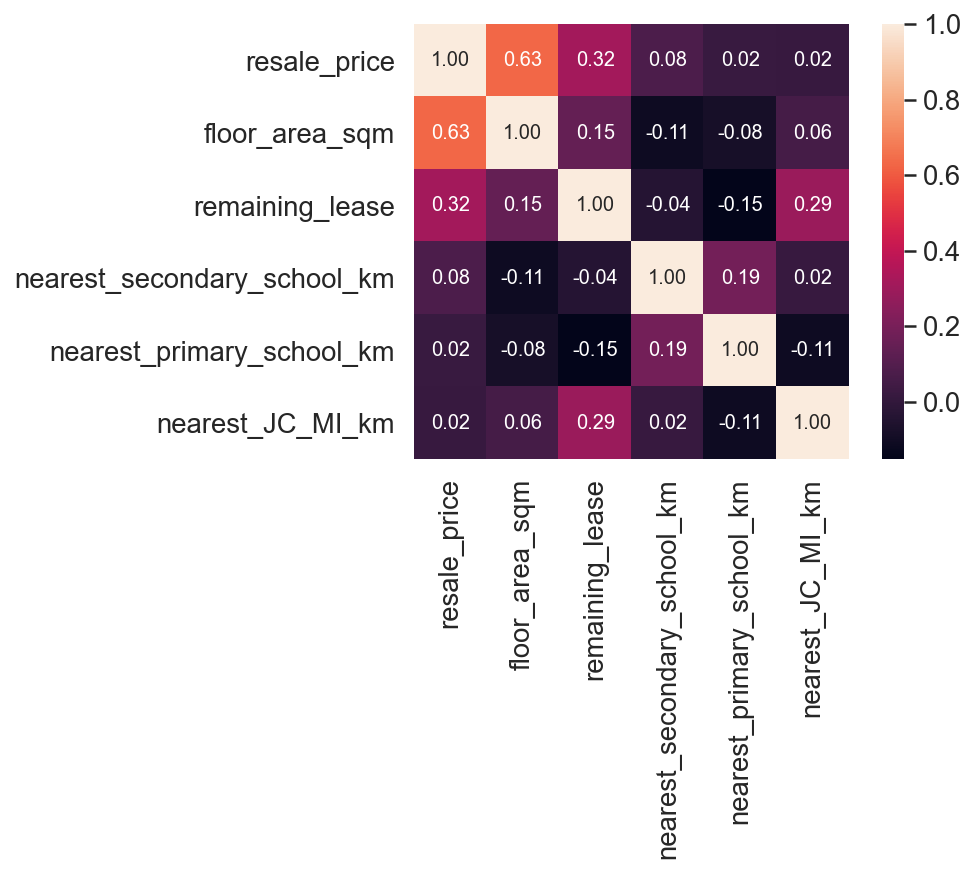

In [6]:
k = 6 #number of variables for heatmap
corrmat = df.corr()
cols = corrmat.nlargest(k, 'resale_price')['resale_price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [7]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,resale_price
1,floor_area_sqm
2,remaining_lease
3,nearest_secondary_school_km
4,nearest_primary_school_km
5,nearest_JC_MI_km


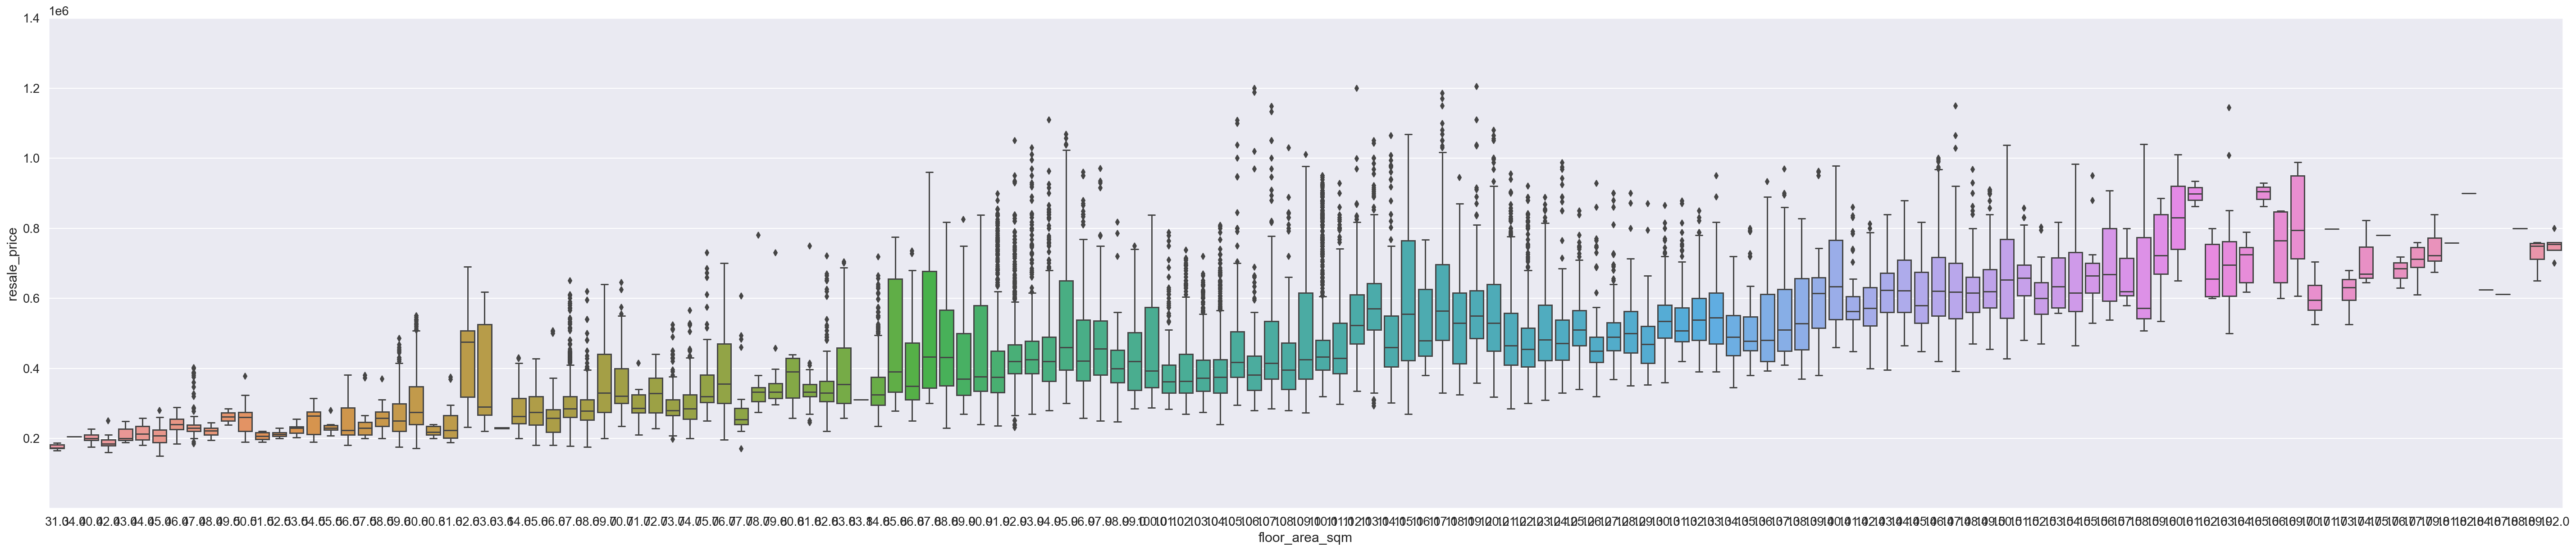

In [8]:
# floor_area_sqm vs resale_price using box plot
var = 'floor_area_sqm'
data = pd.concat([df['resale_price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(50, 10))
fig = sns.boxplot(x=var, y="resale_price", data=data)
fig.axis(ymin=1000, ymax=1400000);

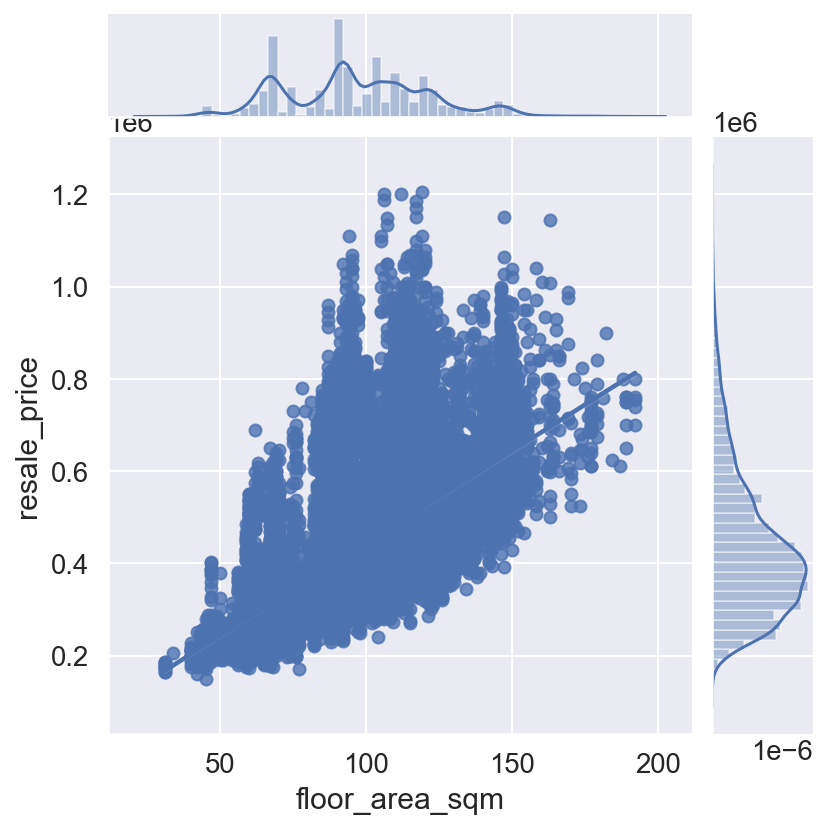

In [9]:
# floor_area_sqm vs resale_price using joint plot
sns.jointplot(x=df['floor_area_sqm'], y=df['resale_price'], kind='reg')
# cannot see pearson r score

## Check and Fix Skewness


In [10]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df['resale_price'].describe()

count     22186.000
mean     432137.913
std      153975.686
min      150000.000
25%      320000.000
50%      400000.000
75%      510000.000
max     1205000.000
Name: resale_price, dtype: float64


 mu = 432137.91 and sigma = 153972.22



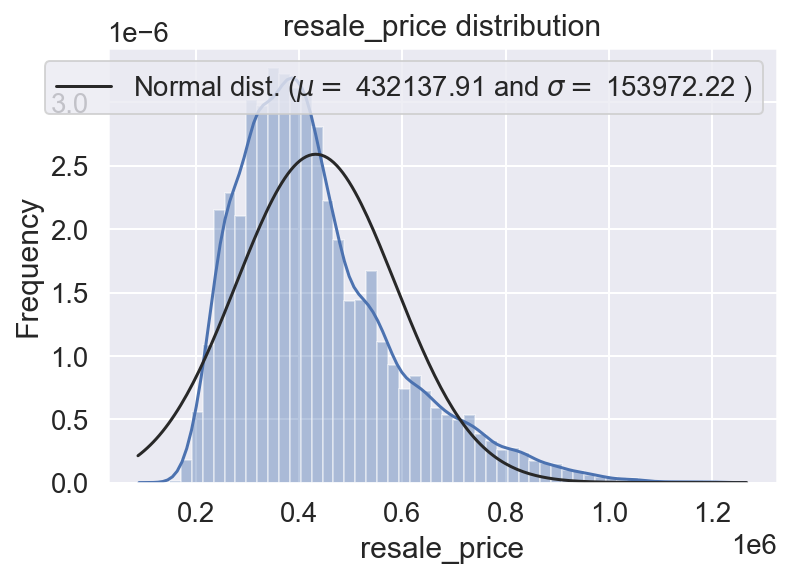

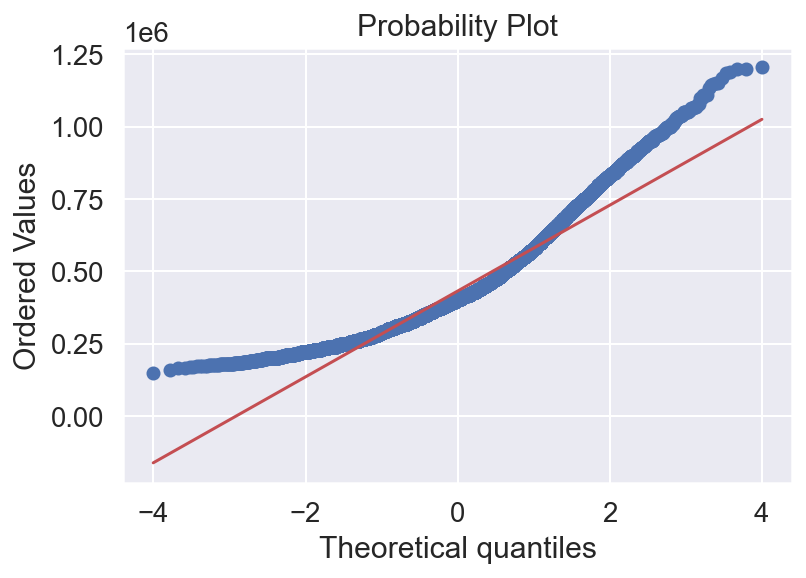

Skewness: 1.103113
Kurtosis: 1.281708


In [11]:
# Plot Histogram
sns.distplot(df['resale_price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['resale_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('resale_price distribution')

fig = plt.figure()
res = stats.probplot(df['resale_price'], plot=plt)
plt.show()

print("Skewness: %f" % df['resale_price'].skew())
print("Kurtosis: %f" % df['resale_price'].kurt())


 mu = 12.92 and sigma = 0.34



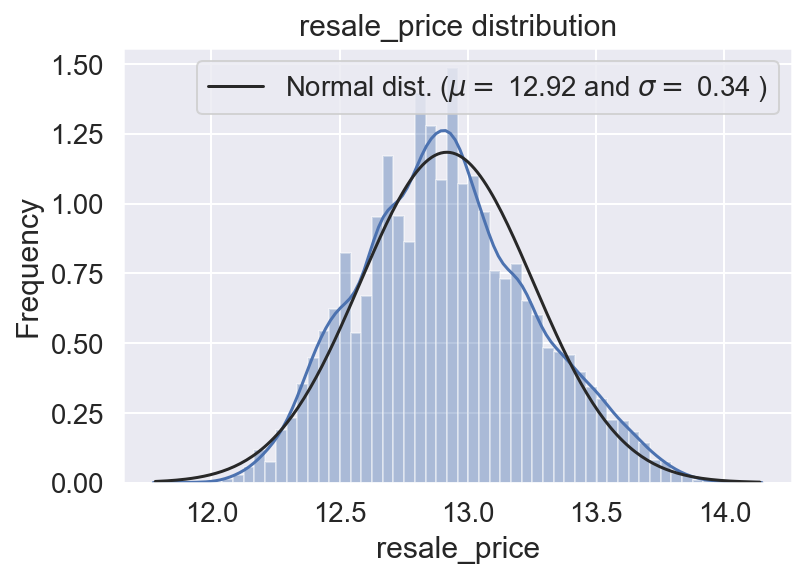

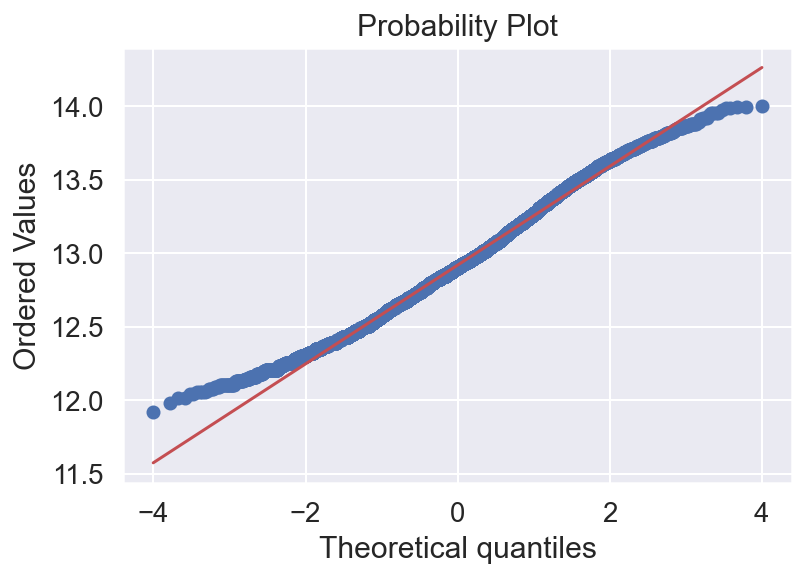

Skewness: 0.233683
Kurtosis: -0.301898


In [12]:
# We use the numpy fuction log1p which  applies log(1+x) to all elements with the resale_price column
df["resale_price"] = np.log1p(df["resale_price"])

#Check the new distribution 
sns.distplot(df['resale_price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['resale_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('resale_price distribution')

fig = plt.figure()
res = stats.probplot(df['resale_price'], plot=plt)
plt.show()

print("Skewness: %f" % df['resale_price'].skew())
print("Kurtosis: %f" % df['resale_price'].kurt())

In [13]:
numeric_feats = df.dtypes[df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
skewness.head()

,Skewed Features
nearest_sm_distance_km,2.190
nearest_primary_school_km,1.836
nearest_secondary_school_km,1.671
nearest_mrt_distance_km,1.076
nearest_JC_MI_km,0.246


In [14]:
skewness = skewness[abs(skewness["Skewed Features"]) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df[feat] = boxcox1p(df[feat], lam)
    df[feat] += 1

There are 4 skewed numerical features to Box Cox transform


## Standardisation

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_var = []
for col in df.select_dtypes(include=['int64','float64']).columns:
    num_var.append(col)

transformed = scaler.fit_transform(df[df.select_dtypes(include=['int64','float64']).columns])

for i, var in enumerate(num_var):
    df[var] = transformed[:,i]
    
df.describe()

,floor_area_sqm,remaining_lease,resale_price,nearest_mrt_distance_km,nearest_primary_school_km,nearest_secondary_school_km,nearest_JC_MI_km,nearest_mixed_level_km,nearest_sm_distance_km,house_age
count,22186.000,22186.000,22186.000,22186.000,22186.000,22186.000,22186.000,22186.000,22186.000,22186.000
mean,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.714,-2.154,-2.967,-1.888,-1.749,-1.895,-1.811,-1.742,-1.945,-1.629
25%,-0.825,-0.792,-0.719,-0.792,-0.765,-0.758,-0.840,-0.919,-0.707,-0.721
50%,-0.127,-0.035,-0.057,-0.120,-0.139,-0.140,-0.033,0.007,-0.124,0.035
75%,0.612,0.721,0.664,0.647,0.576,0.593,0.760,0.818,0.565,0.792
max,3.897,1.629,3.215,4.997,7.751,6.710,2.794,3.070,9.650,2.154


## Convert Categorical Variables

In [16]:
from sklearn import preprocessing
for column in df.columns:
    if df[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        df[column] = le.fit_transform(df[column])
df.head()

,storey_range,floor_area_sqm,remaining_lease,resale_price,nearest_mrt_distance_km,nearest_primary_school_km,nearest_secondary_school_km,nearest_JC_MI_km,nearest_mixed_level_km,nearest_sm_distance_km,house_age,flat_type_model
0,0,-1.194,-1.019,-1.223,0.658,-0.139,0.231,-1.102,-1.232,0.451,1.019,9
1,1,-0.989,-1.397,-0.960,0.928,0.069,-1.414,-1.580,-1.206,-1.945,1.397,9
2,2,-1.236,-1.246,-1.223,1.672,-0.835,-0.647,-1.489,-1.363,-0.896,1.246,9
3,0,-1.236,-1.246,-1.699,1.672,-0.835,-0.647,-1.489,-1.363,-0.896,1.246,9
4,0,-1.194,-1.019,-1.307,0.977,-0.415,0.612,-1.047,-1.251,0.856,1.019,9


## Train Test Split

In [17]:
y = df['resale_price']
X = df.drop(['resale_price'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17748, 11) (4438, 11) (17748,) (4438,)


# Training Data Evaluation

## Regression Models

In [18]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
# import xgboost as xgb
import lightgbm as lgb
from sklearn.tree import DecisionTreeRegressor

In [19]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
# model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
#                              learning_rate=0.05, max_depth=6, 
#                              min_child_weight=1.5, n_estimators=7200,
#                              reg_alpha=0.9, reg_lambda=0.6,
#                              subsample=0.2,seed=42, silent=1,
#                              random_state =7)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
dtr = DecisionTreeRegressor(max_depth=10, random_state=5)

In [20]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X, y)

        return self
    
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)
# averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso, model_xgb, model_lgb))
averaged = AveragingModels(models = (lasso, ENet, KRR, GBoost, model_lgb, dtr))

In [21]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True)
        
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, clf in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(clf)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred

        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)
# stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR, lasso, model_xgb, model_lgb),
#                                                  meta_model = model_xgb)
stacked = StackingAveragedModels(base_models = (lasso, ENet, KRR, model_lgb, dtr),
                                                 meta_model = GBoost)

## Cross Validation

In [22]:
# Cross-validation with k-folds
n_folds = 5
kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)

def RMSE_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

def r2_cv(model):
    r2 = cross_val_score(model, X_train, y_train, scoring='r2', cv = kf)
    return r2

lasso: 0.5519176952423839
ENet: 0.5519165406310778
KRR: 0.45175659043247485
GBoost: 0.22247073527763245
model_lgb: 0.3408717970550275
dtr: 0.38839397850297563
averaged: 0.3624892744195261
stacked: nan


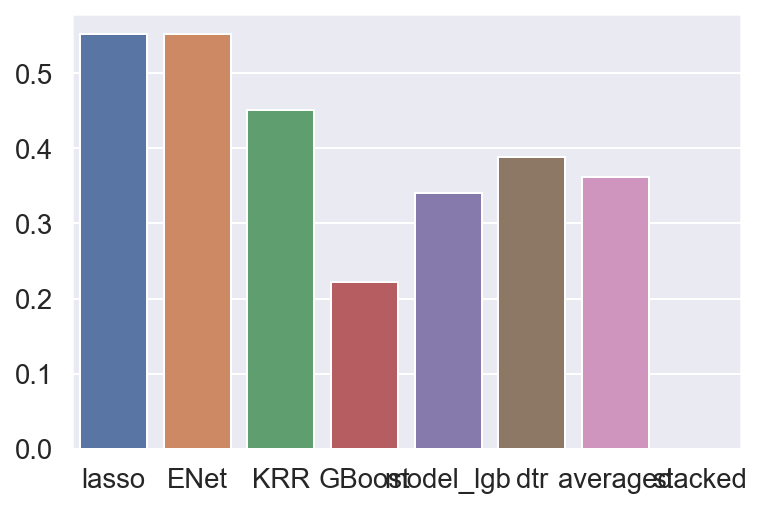

In [23]:
# Root Mean Square Error (RMSE) Evaluation
models = [lasso, ENet, KRR, GBoost, model_lgb, dtr, averaged, stacked]
names = ['lasso', 'ENet', 'KRR', 'GBoost', 'model_lgb', 'dtr', 'averaged', 'stacked']
RMSE_results = []
for i in range(len(models)):
    result = RMSE_cv(models[i]).mean()
    name = names[i]
    RMSE_results.append(result)
    print(name + ': ' + str(result))
sns.barplot(names, RMSE_results)

lasso: 0.6961013325558123
ENet: 0.6961025868920183
KRR: 0.7963744423014927
GBoost: 0.9505590376135181
model_lgb: 0.8840382436465439
dtr: 0.8493019861579301
averaged: 0.8688873009797581
stacked: nan


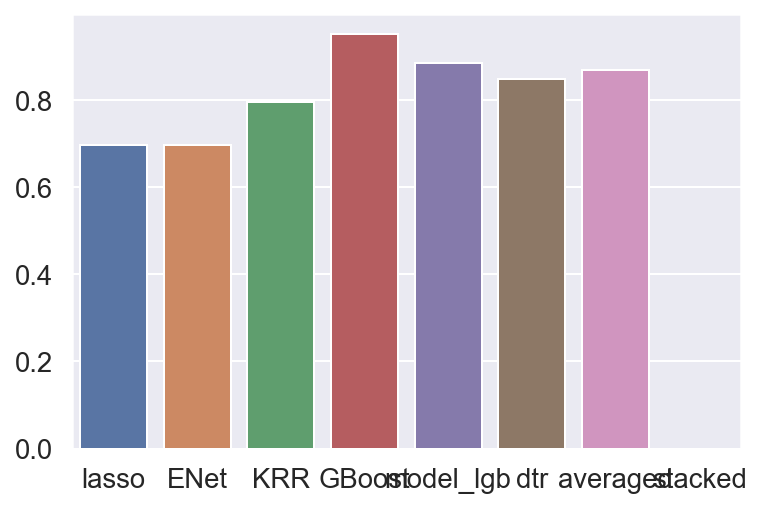

In [24]:
# R2 Evaluation
r2_results = []
for i in range(len(models)):
    result = r2_cv(models[i]).mean()
    name = names[i]
    r2_results.append(result)
    print(name + ': ' + str(result))
sns.barplot(names, r2_results)

# Test Data Evaluation

In [25]:
models.remove(stacked)
names.remove('stacked')

lasso: 0.546004455133977
ENet: 0.5460037581857012
KRR: 0.45080232327606157
GBoost: 0.21491854713452824
model_lgb: 0.337588211846935
dtr: 0.3691634802694388
averaged: 0.3567791254462033


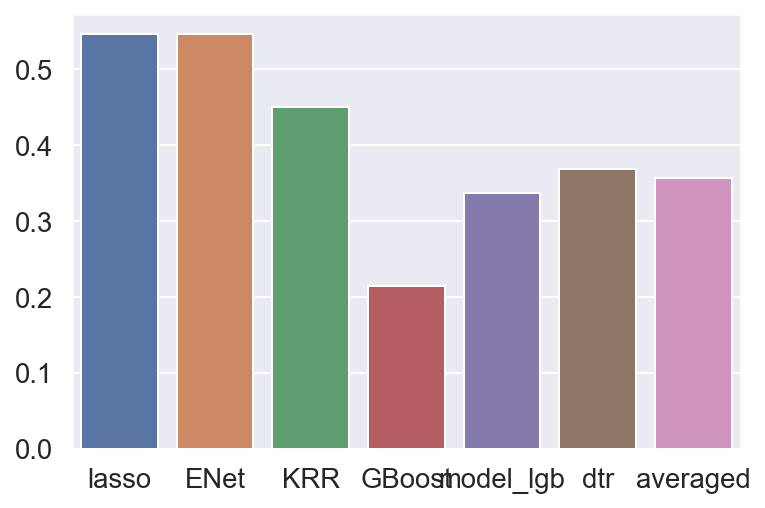

In [26]:
# Root Mean Squared Error (RMSE) Evaluation
RMSE_results = []
for i in range(len(models)):
    model = models[i]
    name = names[i]
    model.fit(X_train, y_train)
    RMSE = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    RMSE_results.append(RMSE)
    print(name + ': ' + str(RMSE))
sns.barplot(names, RMSE_results)

lasso: 0.6981122259197281
ENet: 0.6981129966095178
KRR: 0.7942094425125835
GBoost: 0.9532263841375029
model_lgb: 0.8845941832513753
dtr: 0.8619963364195384
averaged: 0.8711002646413522


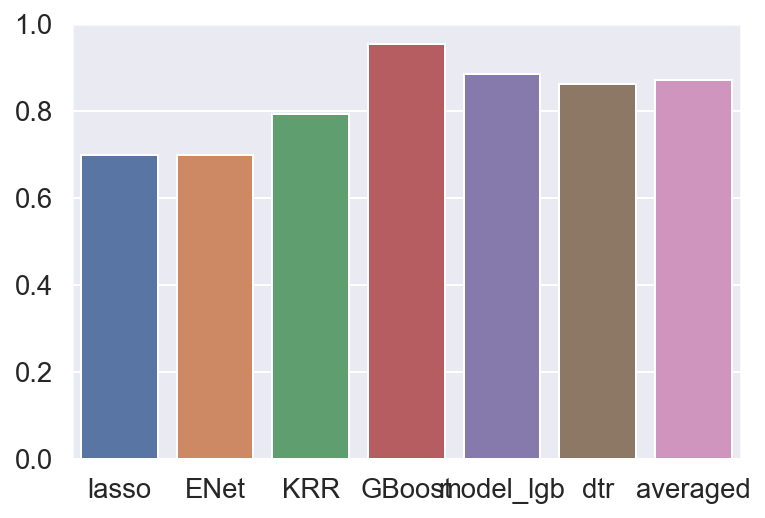

In [27]:
# R2 Evaluation
r2_results = []

for i in range(len(models)):
    model = models[i]
    name = names[i]
    model.fit(X_train, y_train)
    r2 = r2_score(y_test, model.predict(X_test))
    r2_results.append(r2)
    print(name + ': ' + str(r2))
sns.barplot(names, r2_results)

# Comments